# WH AN Plots

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# parameters
AN_label = "/home/submit/"+os.environ['USER']+"/SUEP/AN-23-183/images/{}.pdf"
save_to_AN = True  # control whether to save to AN directory

In [5]:
hist_dir = '/ceph/submit/data/group/cms/store/suep/WH_AN_hists/'

files = []
files += getHistList(hist_dir, "WH_10_5", "../filelist/WH/list_2018_Data_WH.txt", file_ext=".pkl")
files += getHistList(hist_dir, "WH_10_5", "../filelist/WH/list_2018_MC_WH.txt", file_ext=".pkl")
files += getHistList(hist_dir, "WH_10_5_signals_noLimits", "../generic.txt", file_ext=".pkl")

files_vrgj = []
files_vrgj += getHistList(hist_dir, "WH_10_3_VRGJ", "../filelist/WH/list_2018_Data_VRGJ.txt", file_ext=".pkl")
files_vrgj += getHistList(hist_dir, "WH_10_3_VRGJ", "../filelist/WH/list_2018_MC_VRGJ.txt", file_ext=".pkl")
files_vrgj += getHistList(hist_dir, "WH_10_5_VRGJ_signals", "../generic.txt", file_ext=".pkl")
files_vrgj = [f for f in files_vrgj if ("QCD_Pt_15to30" not in f) and ("QCD_Pt_30to50" not in f) and ("QCD_Pt_50to80" not in f)]

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL",
    "tt",
    "WJetsToLNu"
]
bkgs_vrgj = [
    'QCD_Pt',
    'GJets',
]
data = [
    "SingleMuon",
    "EGamma"
]
data_vrgj = [
    "EGamma"
]

In [6]:
plots = loader(files, by_bin=True, by_year=True, verbose=True, load_cutflows=True)
plots_vrgj = loader(files_vrgj, by_bin=True, by_year=True, verbose=True, load_cutflows=True)

plots = combineSamples(plots, samples=[s+"_2018" for s in bkgs], new_tag='MC_2018')
plots = combineSamples(plots, samples=[s+"_2018" for s in data], new_tag='data_2018')

plots_vrgj = combineSamples(plots_vrgj, samples=[s+"_2018" for s in bkgs_vrgj], new_tag='MC-VRGJ_2018')
plots_vrgj = combineSamples(plots_vrgj, samples=[s+"_2018" for s in data_vrgj], new_tag='data-VRGJ_2018')

Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5/EGamma+Run2018A-UL2018_MiniAODv2-v1+MINIAOD.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018A
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5/EGamma+Run2018B-UL2018_MiniAODv2-v1+MINIAOD.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018B
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5/EGamma+Run2018C-UL2018_MiniAODv2-v1+MINIAOD.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018C
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5/EGamma+Run2018D-UL2018_MiniAODv2-v2+MINIAOD.pkl
	Found era 2018
	Found sample EGamma
	Found bin EGamma+Run2018D
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5/SingleMuon+Run2018A-UL2018_MiniAODv2-v3+MINIAOD.pkl
	Found era 2018
	Found sample SingleMuon
	Found bin SingleMu

# 4. Object Selection

## 4.6 SUEP Candidate

Agreement between gen and reco SUEP.

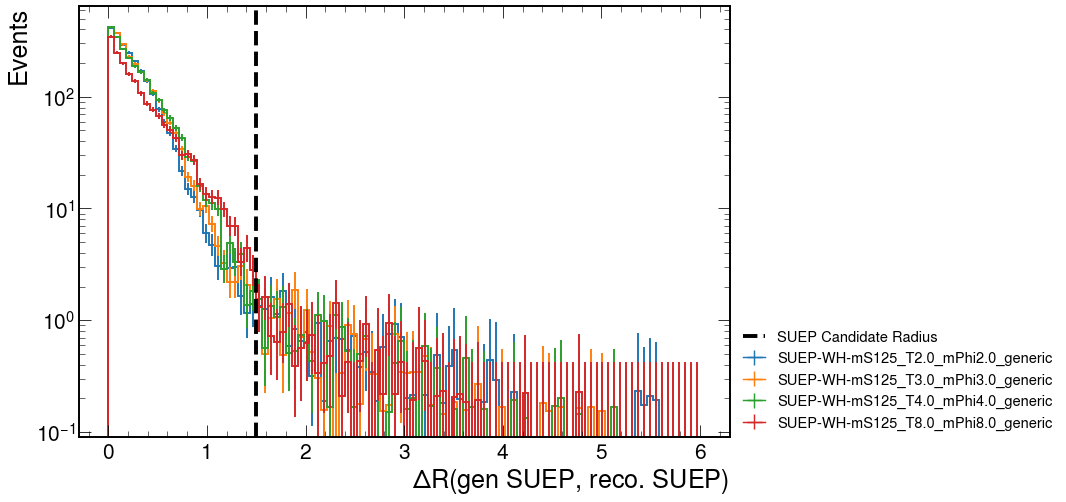

In [33]:
plot_label = "deltaR_genSUEP_SUEP_SR"
samples = [
    "SUEP-WH-mS125_T2.0_mPhi2.0_generic",
    "SUEP-WH-mS125_T3.0_mPhi3.0_generic",
    "SUEP-WH-mS125_T4.0_mPhi4.0_generic",
    "SUEP-WH-mS125_T8.0_mPhi8.0_generic",
]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

for sample in samples:
    hep.histplot(plots[sample][plot_label], label=sample, histtype='step', linewidth=2, ax=ax)

ax.axvline(1.5, color='black', linestyle='--', label='SUEP Candidate Radius', linewidth=4)
ax.legend(fontsize='xx-small', loc=(1.01,0))
ax.set_ylabel("Events")
ax.set_yscale('log')
if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}"), bbox_inches='tight')
fig.show()

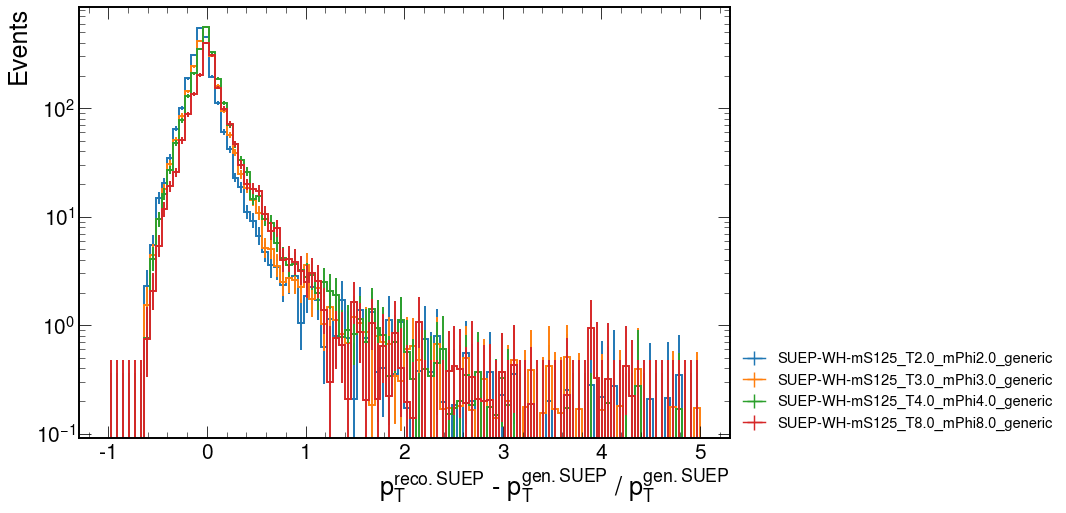

In [34]:
plot_label = "SUEP_genSUEP_BV_SR"
samples = [
    "SUEP-WH-mS125_T2.0_mPhi2.0_generic",
    "SUEP-WH-mS125_T3.0_mPhi3.0_generic",
    "SUEP-WH-mS125_T4.0_mPhi4.0_generic",
    "SUEP-WH-mS125_T8.0_mPhi8.0_generic",
]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

for sample in samples:
    hep.histplot(plots[sample][plot_label], label=sample, histtype='step', linewidth=2, ax=ax)

ax.legend(fontsize='xx-small', loc=(1.01,0))
ax.set_ylabel("Events")
ax.set_yscale('log')
if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}"), bbox_inches='tight')
fig.show()

# 6. Event Selection

## 6.1 Signal Region

In [9]:
samples= [
    'data_2018',
    'MC_2018',
    'WJetsToLNu_2018',
    'tt_2018',
    'DYJetsToLL_2018',
    'QCD_Pt_2018', 
    "SUEP-WH-mS125_T2.0_mPhi2.0_generic",
    "SUEP-WH-mS125_T3.0_mPhi3.0_generic",
    "SUEP-WH-mS125_T4.0_mPhi4.0_generic",
    "SUEP-WH-mS125_T8.0_mPhi8.0_generic",
] 
selections = [
    'total', 'goldenJSON', 
    'allTriggers',  'qualityFilters', 'orthogonality', 'oneTightLepton', 'MET20',
    'oneCluster', 'twoTracksInCluster',
    'SUEP_nconst_HighestPT_>=_10.0_SR',
    'WH_MET_pt_>_30.0_SR',
    'W_pt_>_60.0_SR',
    "W_mt_>_30.0_SR",
    'bjetSel_==_1.0_SR',
    'deltaPhi_SUEP_W_>_1.5_SR', 'deltaPhi_SUEP_MET_>_1.5_SR', 'deltaPhi_lepton_SUEP_>_1.5_SR',
    'cutflow_ak4jets_inSUEPcluster_n_HighestPT_>=_1.0_SR',
    'W_SUEP_BV_<_2.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_SR',
    'SUEP_S1_HighestPT_>_0.3_SR'
]
selection_labels = [
    'Total','Golden JSON',
    'Triggers', 'Quality filters', 'ZH, ggF orthogonality', 'One tight lepton', '$p^{MET}_T > 20 \GeV$',
    'One ak15 cluster', 'Two tracks in ak15 cluster',
    '\\nSUEPconstituents $>$ 10 (and blind)',
    '$p^{MET}_T > 30 \GeV$',
    '$p^{W}_T > 40 \GeV$',
    "$30 \GeV < m^{W}_T < 130 \GeV$",
    '0 ($<$ 2) tight (loose) b-tagged jets',
    '$\Delta\phi$(SUEP, W) $>$ 1.5', '$\Delta\phi$(SUEP, MET) $>$ 1.5', '$\Delta\phi$(lepton, SUEP) $>$ 1.5',
    '$> 0$ ak4 jets inside SUEP candidate',
    'BV(W, SUEP) $< 2.0$',
    'min($\Delta\phi$(jet, MET)) $>$ 1.5',
    '\\boostedSphercity $>$ 0.3'
]

# SUEPER TEMPOROARY
for sample in samples:
    for key in list(plots[sample].keys()):
        if 'cutflow' in key and 'nominal' in key:
            plots[sample][key.replace("_nominal", "")] = plots[sample][key]

table = cutflow_table(plots, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table.get_latex_string())
print()
table = cutflow_table(plots, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=3)
print("Relative efficiencies")
print(table.get_latex_string())

Yields
\begin{tabular}{ccccccccccc}
Selection & data_2018 & MC_2018 & WJetsToLNu_2018 & tt_2018 & DYJetsToLL_2018 & QCD_Pt_2018 & SUEP-WH-mS125_T2.0_mPhi2.0_generic & SUEP-WH-mS125_T3.0_mPhi3.0_generic & SUEP-WH-mS125_T4.0_mPhi4.0_generic & SUEP-WH-mS125_T8.0_mPhi8.0_generic \\
Total & 2.3613e+09 & 8.1898e+13 & 3.7197e+09 & 2.7135e+07 & 1.1867e+08 & 8.1894e+13 & 25807 & 25807 & 25807 & 25807 \\
Golden JSON & 2.2594e+09 & 8.1898e+13 & 3.7197e+09 & 2.7135e+07 & 1.1867e+08 & 8.1894e+13 & 25807 & 25807 & 25807 & 25807 \\
Triggers & 1.3987e+09 & 1.6425e+09 & 7.619e+08 & 1.133e+07 & 5.007e+07 & 8.1154e+08 & 9063.3 & 9037.2 & 9083.6 & 9091.9 \\
Quality filters & 1.3973e+09 & 1.642e+09 & 7.618e+08 & 1.1324e+07 & 5.0057e+07 & 8.1121e+08 & 9061 & 9035.6 & 9082.2 & 9087.8 \\
ZH, ggF orthogonality & 8.1652e+08 & 9.3375e+08 & 7.0051e+08 & 9.7911e+06 & 2.0396e+07 & 1.9703e+08 & 8435.8 & 8389.7 & 8420.7 & 8422.5 \\
One tight lepton & 6.0679e+08 & 6.4655e+08 & 5.6828e+08 & 8.1944e+06 & 1.6977e+07 & 4.

## 6.2 CRWJ

## 6.3 VRGJ

In [35]:
# mapping between plotting tags and the text we want to show in the top right of each figure to denote which region we are in
region_labels = {
    "VRGJlowS": "$\gamma$ + jets - low sphericity",
    "VRGJhighS": "$\gamma$ + jets - high sphericity",
}

Gamma + jets histograms with data and MC for each year.

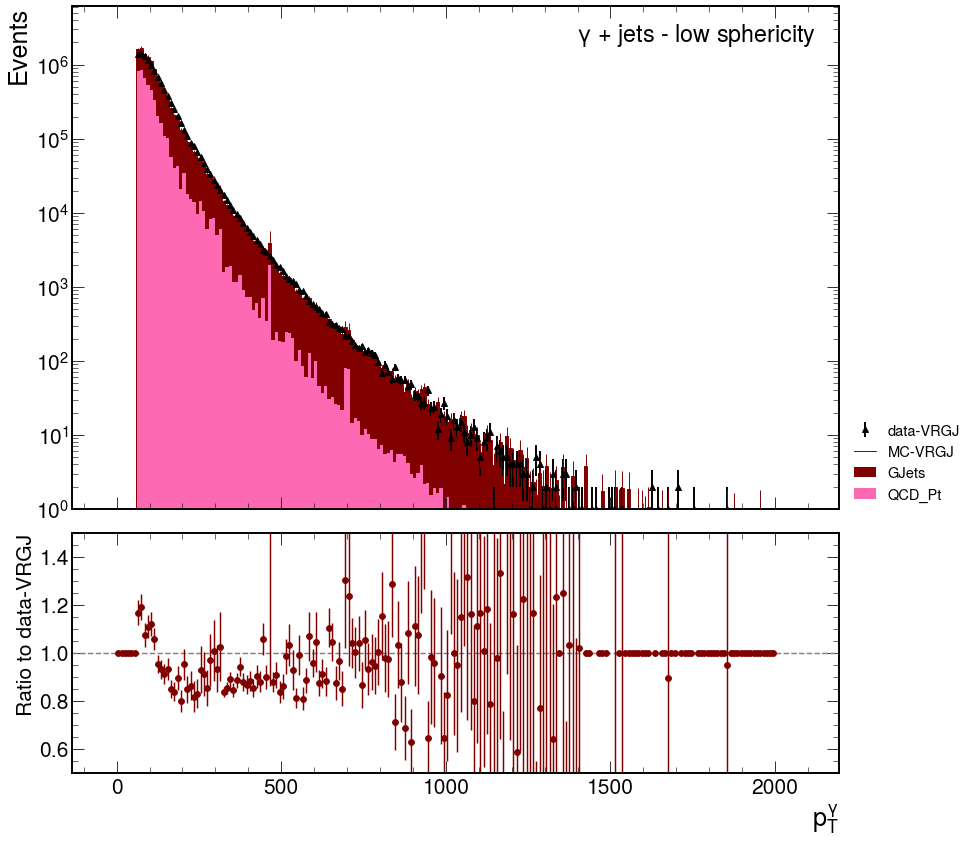

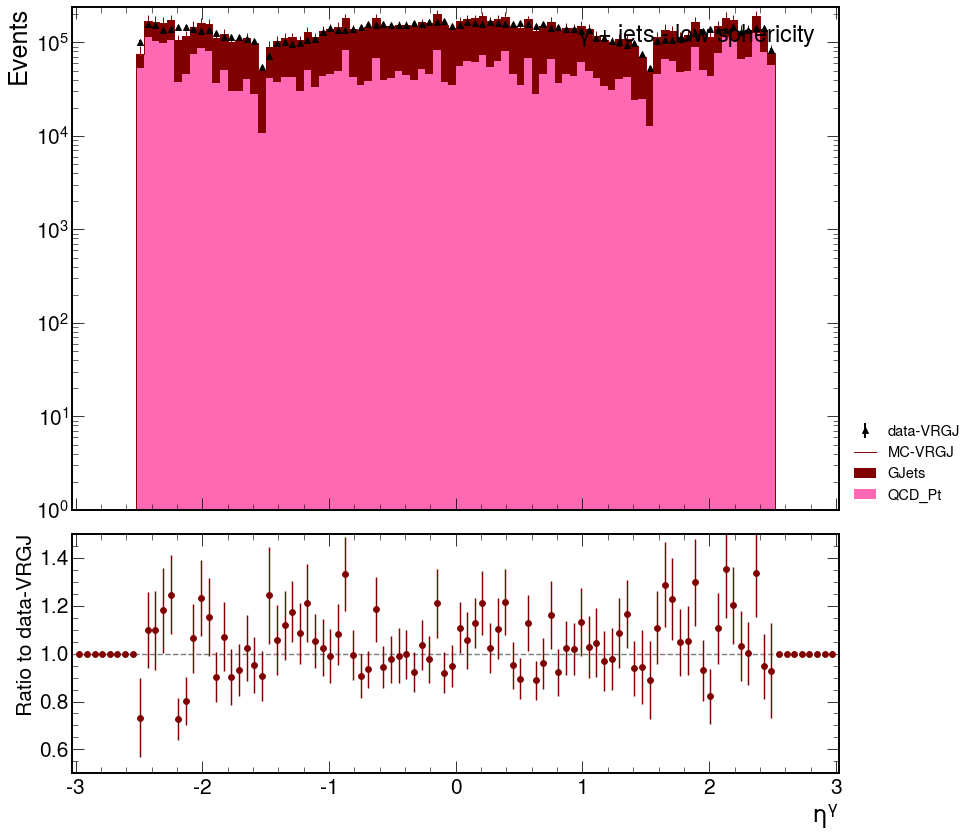

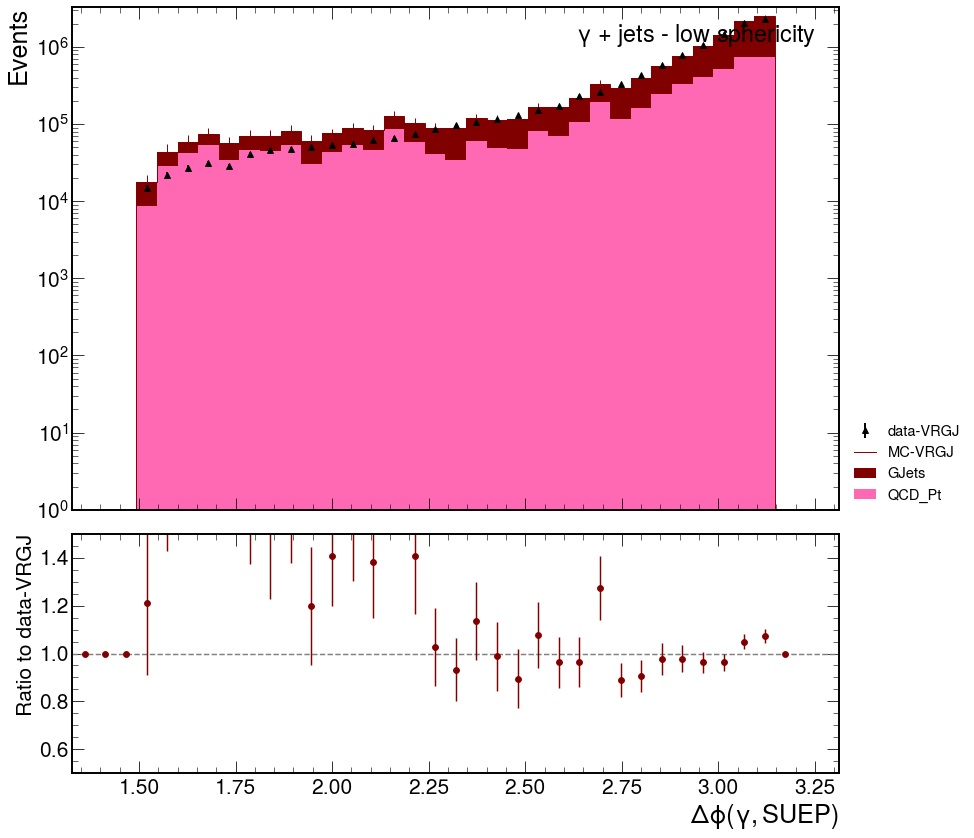

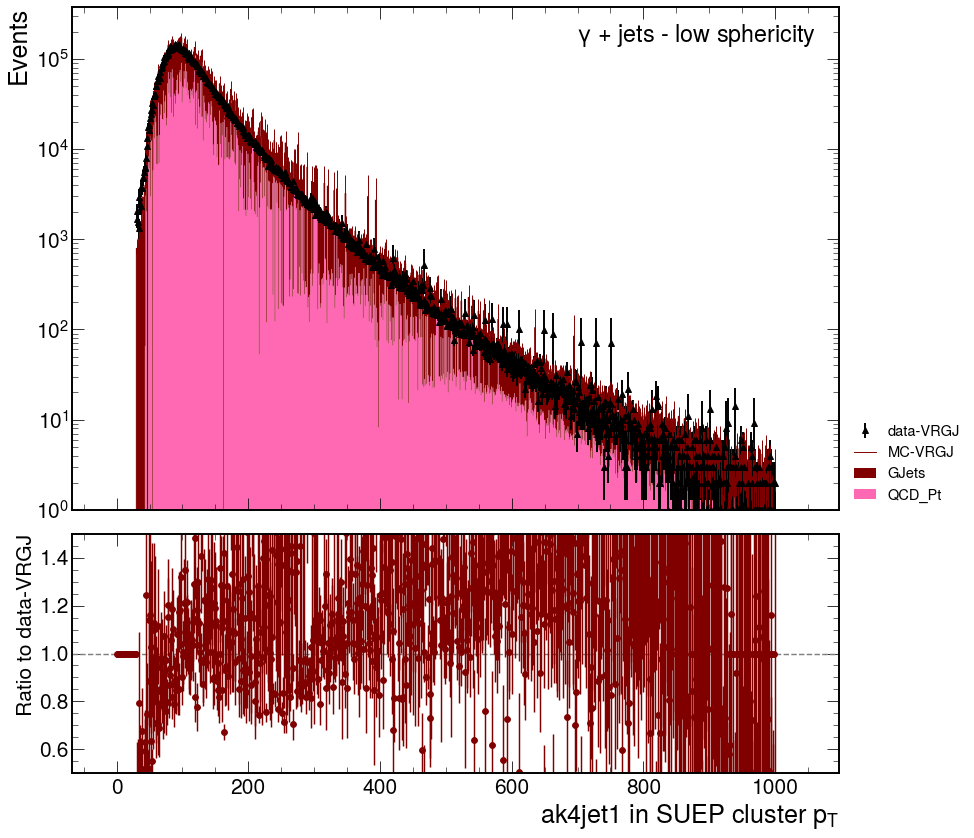

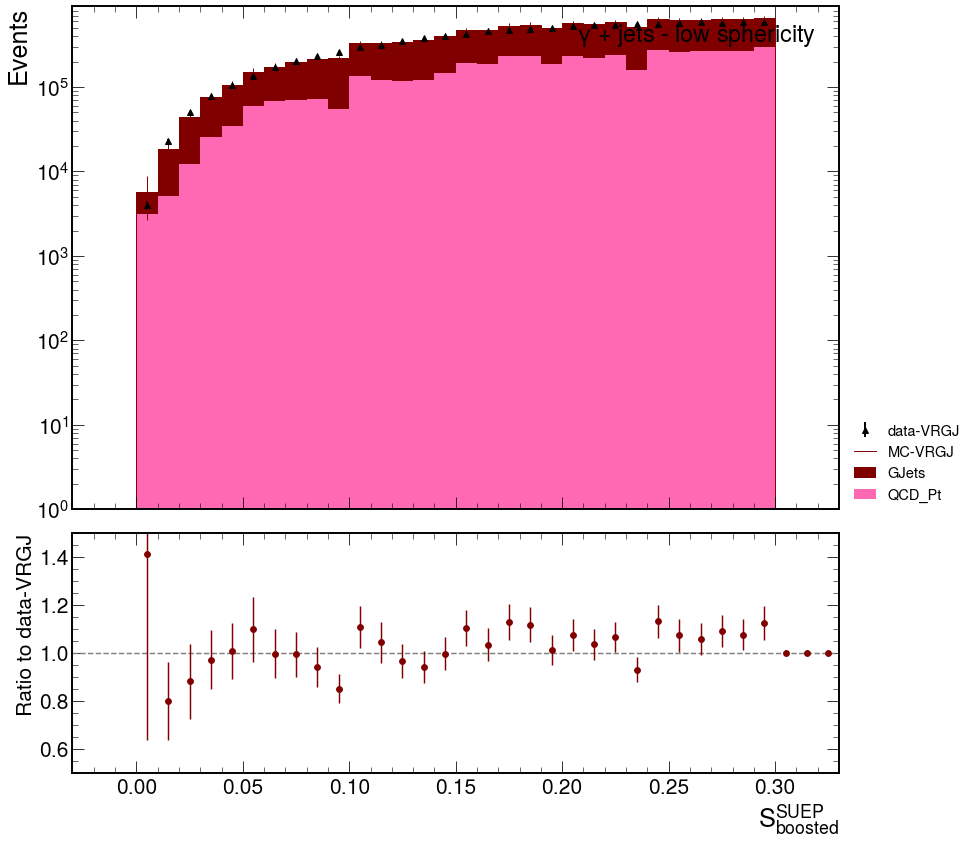

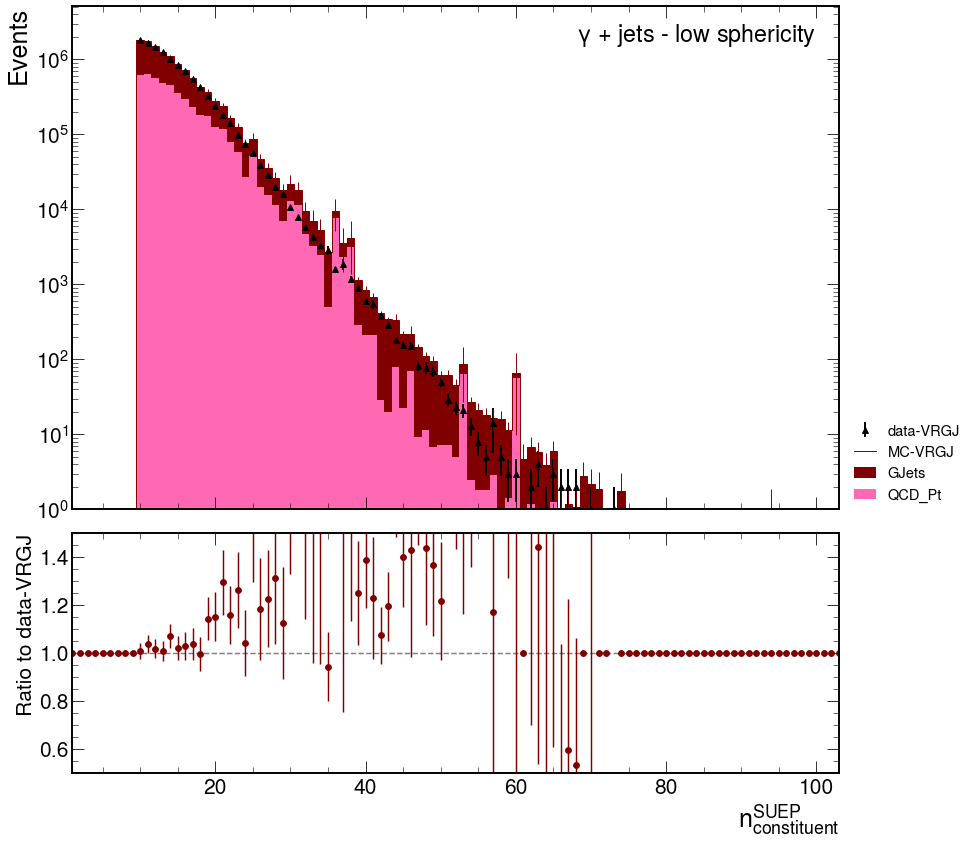

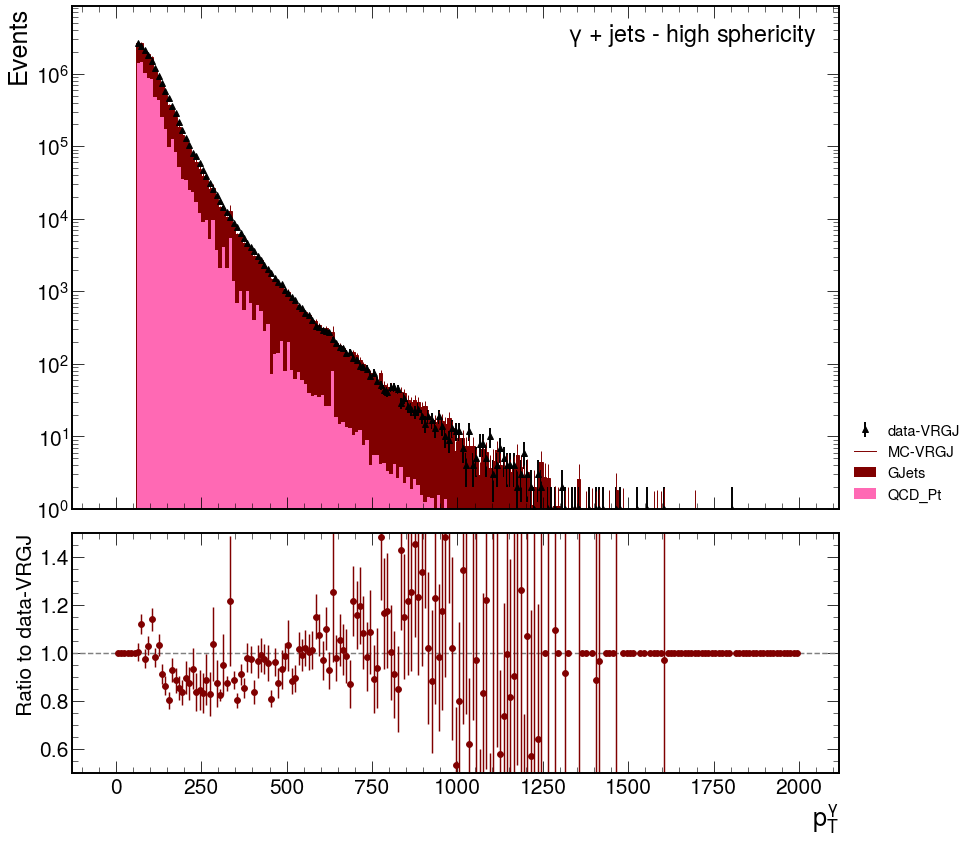

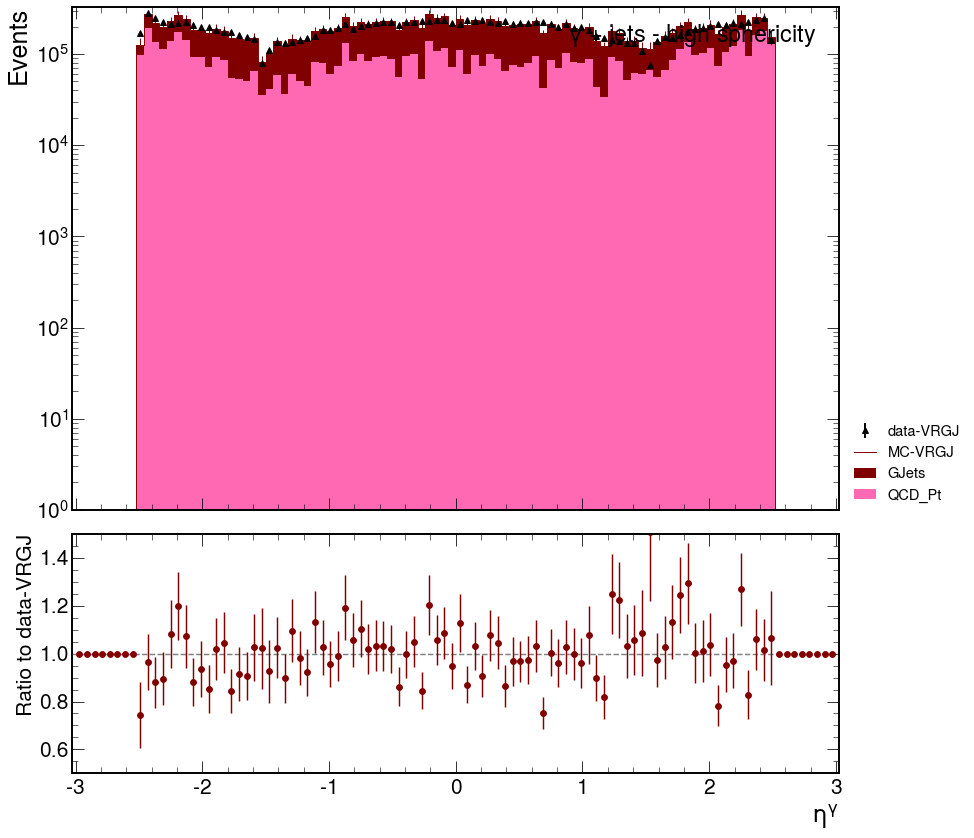

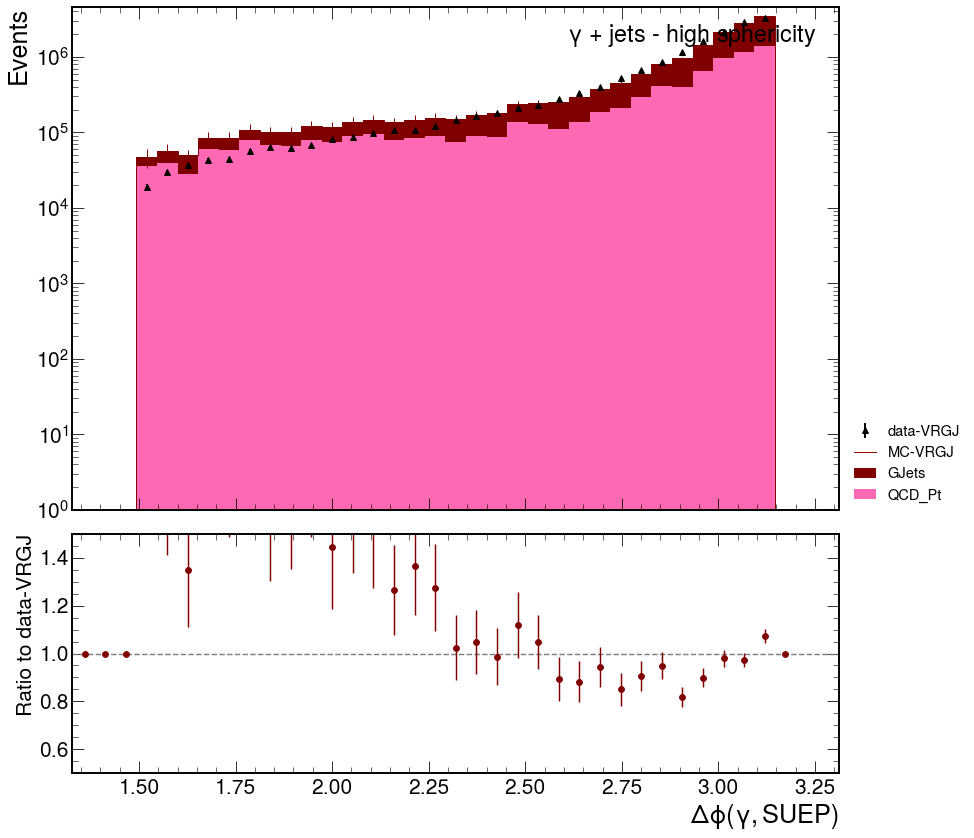

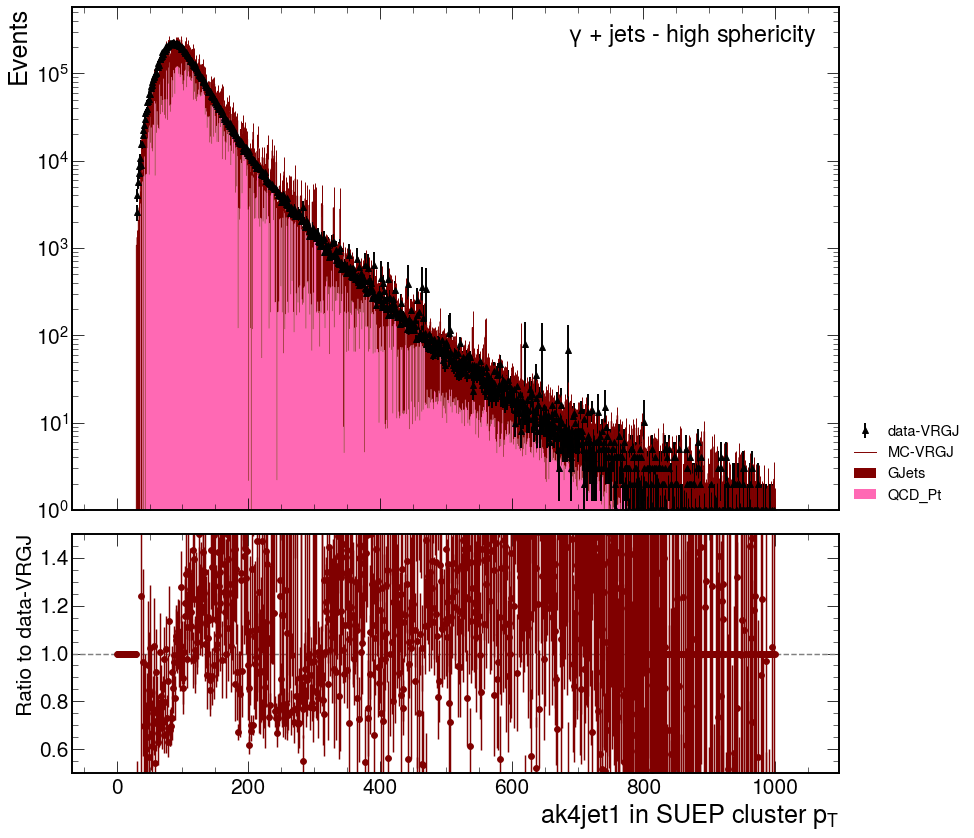

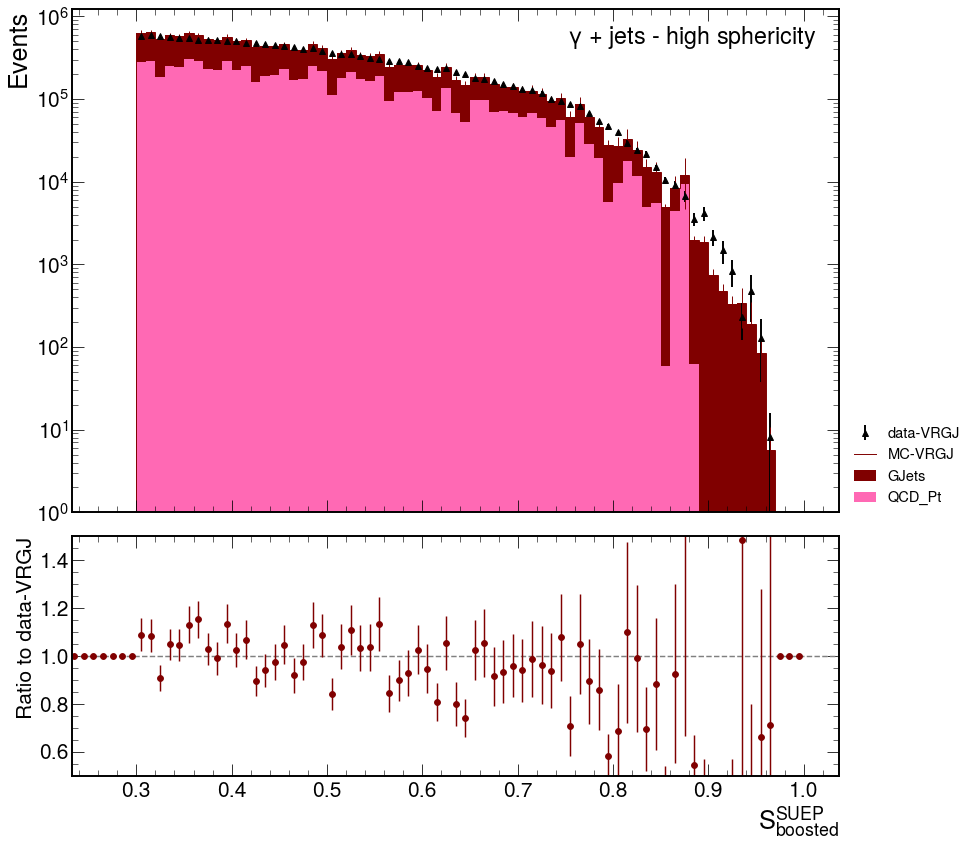

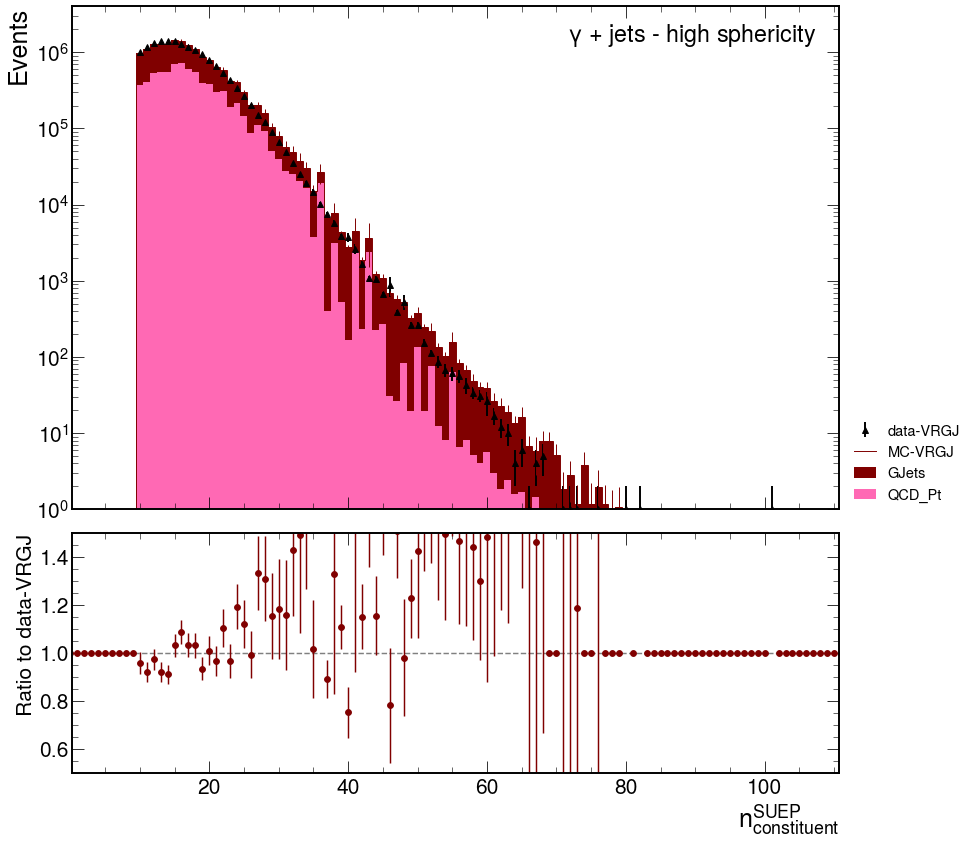

In [36]:
years = ['2018']
plot_tags = [
    "VRGJlowS",
    "VRGJhighS"
]
plot_labels =  [
    "photon_pt",
    "photon_eta",
    "deltaPhi_SUEP_photon",
    "ak4jet1_inSUEPcluster_pt",
    "SUEP_S1",
    "SUEP_nconst"
]
samples = ['data-VRGJ', 'MC-VRGJ']
stacked_samples = bkgs_vrgj

for year in years:

    for tag in plot_tags:

            for plot_label in plot_labels:
                  
                hlist = [plots_vrgj[sample+"_"+year][plot_label+"_"+tag] for sample in samples]
                stacked_hlist = [plots_vrgj[sample+"_"+year][plot_label+"_"+tag] for sample in stacked_samples]

                fig, axs = styled_plot_ratio(hlist, samples, stacked_hlist=stacked_hlist, stacked_labels=stacked_samples, density=False)
                fig.set_size_inches(15, 15)
                axs[1].set_ylim(0.5, 1.5)

                axs[0].text(0.97, 0.97, region_labels.get(tag, None),
                transform=axs[0].transAxes, 
                fontsize=24, va='top', ha='right')

                if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}_{tag}_{year}"), bbox_inches='tight')
                fig.show()

Comparison of CRWJ and VRGJlowS

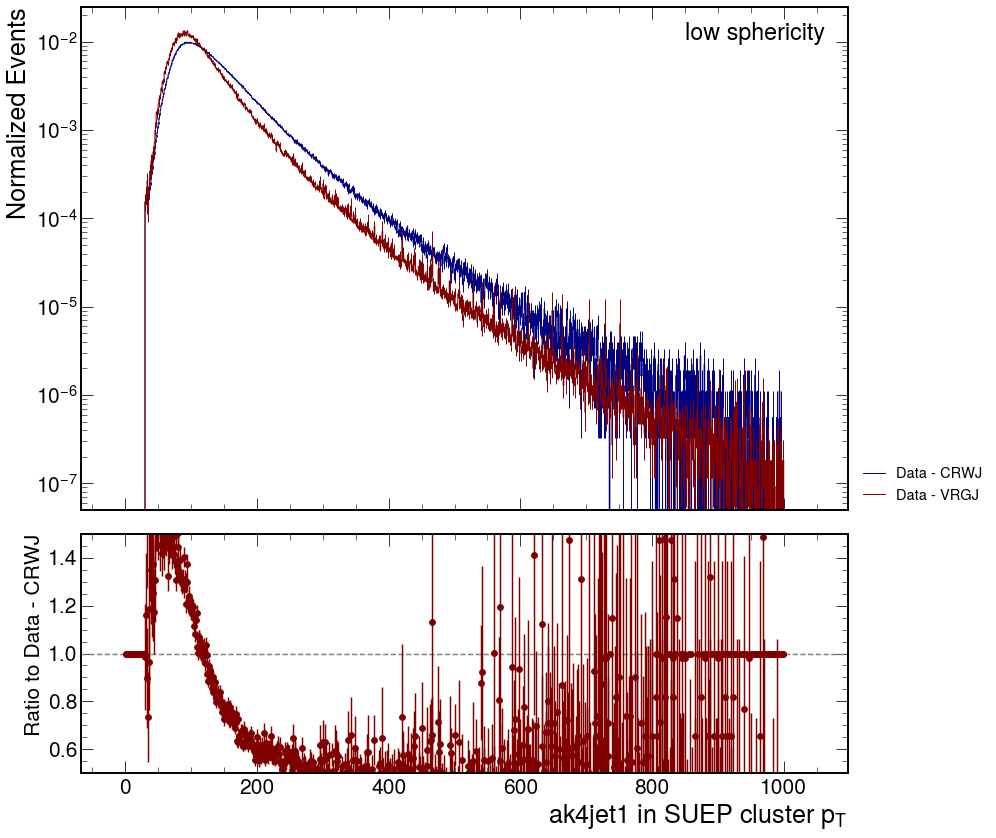

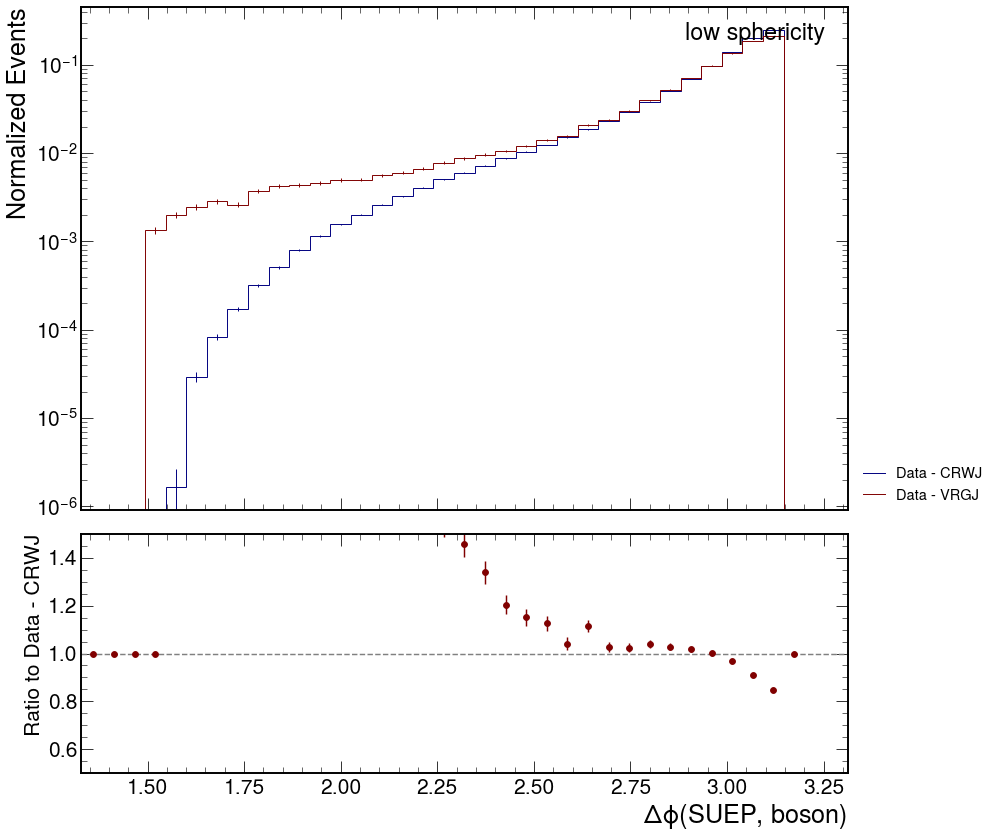

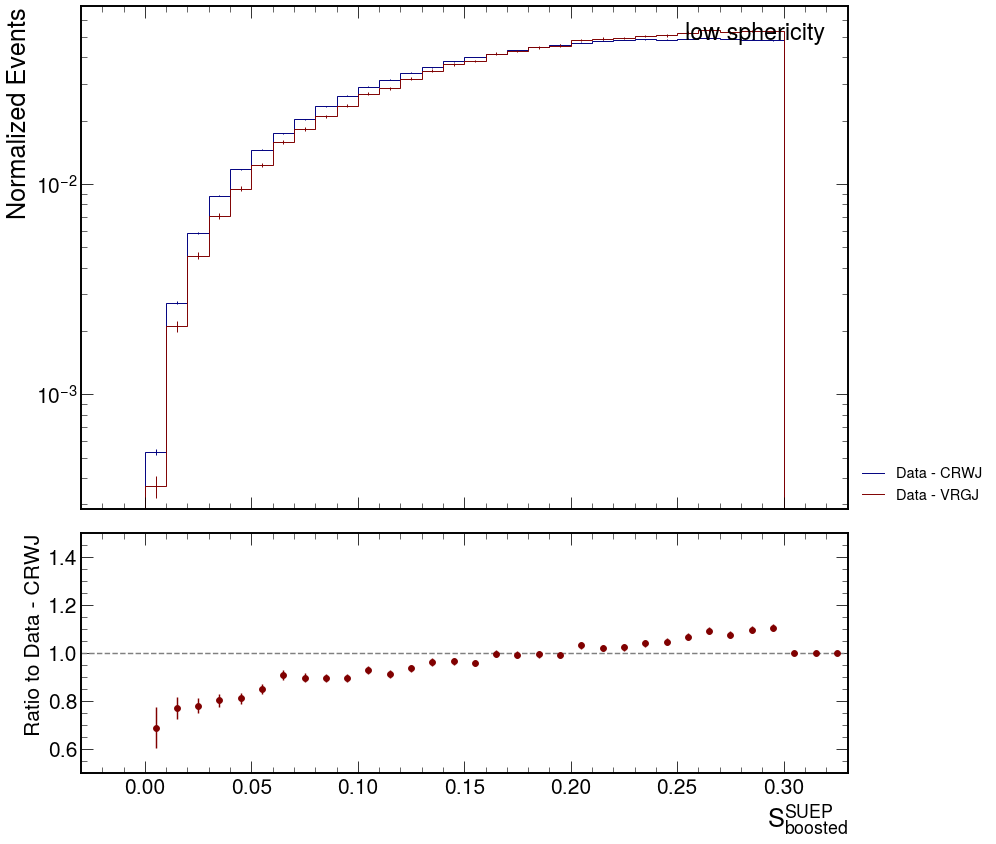

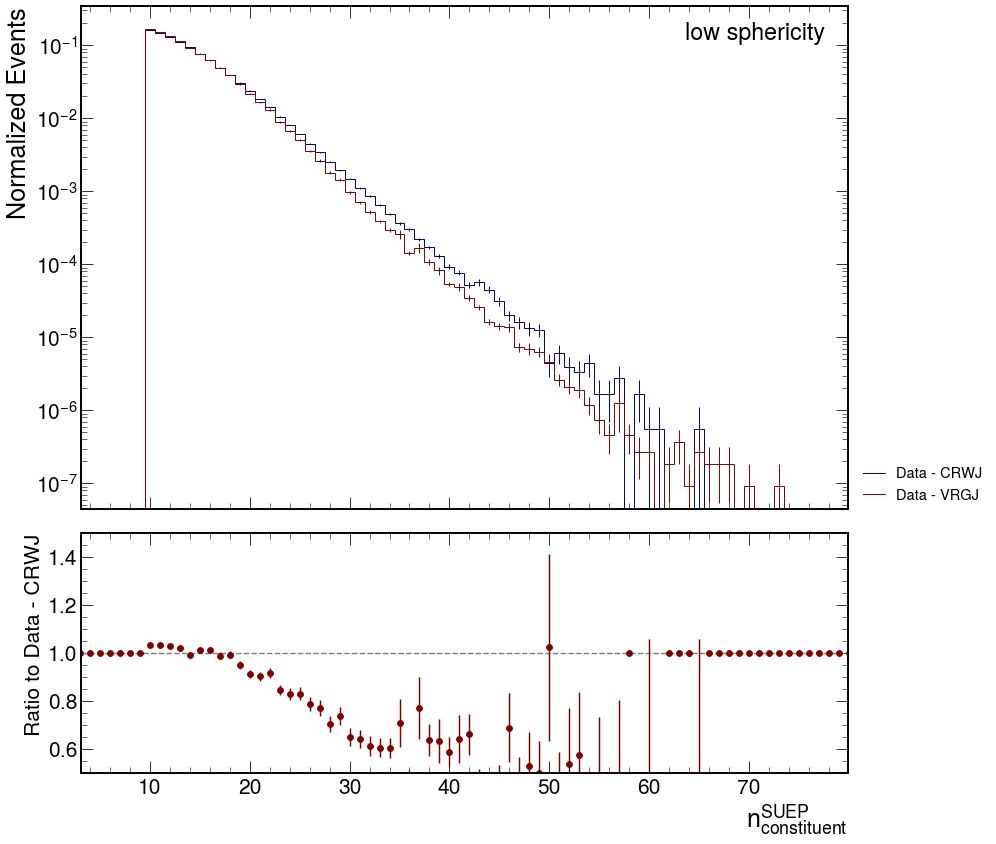

In [37]:
years = ['2018']
plot_labels = [
    ["ak4jet1_inSUEPcluster_pt_CRWJ", "ak4jet1_inSUEPcluster_pt_VRGJlowS"],
    ['deltaPhi_SUEP_W_CRWJ', 'deltaPhi_SUEP_photon_VRGJlowS'],
    ['SUEP_S1_CRWJ', 'SUEP_S1_VRGJlowS'],
    ['SUEP_nconst_CRWJ', 'SUEP_nconst_VRGJlowS'],
]
for year in years:
    for pair in plot_labels:

        hwjets = plots['data_'+year][pair[0]].copy()
        hgjets = plots_vrgj['data-VRGJ_'+year][pair[1]].copy()

        if len(hwjets.axes[0]) != len(hgjets.axes[0]):
            ub = min(hwjets.axes[0].edges[-1], hgjets.axes[0].edges[-1]) * 1.0j
            hwjets = hwjets[:ub]
            hgjets = hgjets[:ub]
            lb = max(hwjets.axes[0].edges[0], hgjets.axes[0].edges[0]) * 1.0j
            hwjets = hwjets[lb:]
            hgjets = hgjets[lb:]

            if len(hwjets.axes[0]) < len(hgjets.axes[0]):
                hgjets = rebin_piecewise(hgjets, hwjets.axes[0].edges)
            elif len(hwjets.axes[0]) > len(hgjets.axes[0]):
                hwjets = rebin_piecewise(hwjets, hgjets.axes[0].edges)

        fig, axs = styled_plot_ratio([hwjets, hgjets], labels=["Data - CRWJ", "Data - VRGJ"], density=True)
        xlabel = hwjets.axes[0].label.replace("W", "boson")
        fig.set_size_inches(15, 15)
        axs[1].set_xlabel(xlabel)
        axs[1].set_ylim(0.5, 1.5)
        axs[0].text(0.97, 0.97, "low sphericity",
        transform=axs[0].transAxes, 
        fontsize=24,  va='top', ha='right')

        out_label = pair[0].replace("_W_", "_boson_").replace("_CRWJ", "")
        if save_to_AN: fig.savefig(AN_label.format(f"{out_label}_CRWJVRGJlowS_"+year), bbox_inches='tight')
        
        fig.show()
